# Climate - MALIN HEAD
---
In this notebook, I will analyse the meteorological conditions collected in the Malin Head station, in Donegal County, Ireland. This information was extracted by Met Éireann and can be found in the following link. I downloaded the data into the CSV folder.

https://cli.fusio.net/cli/climate_data/webdata/hly1575.zip


## Load the data
To analyse the data with Python, the package pandas has to be imported. Then the csv file can be loaded into the program with pd.read_csv, using the path and the name of the file. Then I noticed that the indices are located in row 24, so I needed to skip the first 23 rows. I also used low_memory=False because it was showing a DtypeWarning when loading the CSV. This means that the DataFrame it's very long with mixed data types in some columns, so to avoid the machine to deduce of some results, this parameter is set to False.

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
https://pandas.pydata.org/docs/reference/api/pandas.errors.DtypeWarning.html

In [1]:
# Import libraries.
import pandas as pd

In [2]:
# Name of the file.
FILENAME = "hly1575.csv"

# Path to the file.
DATADIR = "./csv/"

# Identify the file.
logFilename = DATADIR + FILENAME

# Load the csv.
df = pd.read_csv(logFilename, skiprows=23, low_memory=False)

# Check the first 3 rows.
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,01-may-1955 01:00,0,0.0,0,8.5,0,7.2,5.5,9.1,83,...,0,11,0,130,3,2,0.0,30000,40,7
1,01-may-1955 02:00,0,0.0,0,8.2,0,7.2,6.1,9.3,85,...,0,11,0,120,1,2,0.0,30000,100,6
2,01-may-1955 03:00,3,0.0,0,7.3,0,6.6,5.5,9.3,91,...,0,8,0,120,1,2,0.0,30000,220,5


## Analyse data

In this part I checked the data types and if there's any missing or invalid data. This is very important to know if the data needs to be cleaned before doing a deep analysis of the variables.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html
https://stackoverflow.com/questions/49677060/pandas-count-empty-strings-in-a-column/77288170#77288170

In [3]:
# Check variable types.
df.dtypes

date      object
ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb      object
dewpt     object
vappr     object
rhum      object
msl      float64
ind.3      int64
wdsp      object
ind.4      int64
wddir     object
ww        object
w         object
sun       object
vis       object
clht      object
clamt     object
dtype: object

In [4]:
# Check if there are any missing values in the data set.
df.isnull().sum()

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64

In [5]:
# Check if there are any empty values.
df.eq(" ").sum()

date          0
ind           0
rain          3
ind.1         0
temp          0
ind.2         0
wetb          6
dewpt         6
vappr         6
rhum          6
msl           0
ind.3         0
wdsp         52
ind.4         0
wddir       106
ww       130148
w        130148
sun      130032
vis      130228
clht     130172
clamt    130172
dtype: int64

In [6]:
# check if there are "0" values.
df.eq(0).sum()

date          0
ind      488318
rain          0
ind.1    607604
temp        276
ind.2    605431
wetb          0
dewpt         0
vappr         0
rhum          0
msl           0
ind.3    173882
wdsp          0
ind.4    173883
wddir         0
ww            0
w             0
sun           0
vis           0
clht          0
clamt         0
dtype: int64

## Wind speed for energy production.

Now that the data has been analysed, there are some variables that show some interest and might have some potential for energy production in this location, for example, installation of windmills. For this I will check if the wind speed registered was good enough in the past years for windmills and if it's a good location to install them.
As the Irish Wind Energy Association stated, the minimum wind speed necessary to produce energy at Beaufort Scale (BS) 3, 7 knots, and maximum output is reached at BS 5, 21 knots. When the wind speed is higher than BS 10, 48 knots, the wind turbines stop working to prevent damage. 


http://www.iwea.ie/index.cfm/page/technicalfaqs?#q29
https://www.met.ie/forecasts/marine-inland-lakes/beaufort-scale
https://www.met.ie/cms/assets/uploads/2022/09/Beaufort-scale-for-land.png

To check the wind speed over time, the "date" variable needs to be converted to datetime object to have a clear plot of the time, otherwise machine will treat it like an object and won't recognise periods of time. After that, I identify the days and the months with .dt.strftime.

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.strftime.html

In [7]:
#  Use datetime to treat the column "date" as datetime object.
df["date"]= pd.to_datetime(df["date"], format="%d-%b-%Y %H:%M")

In [8]:
# select the days.
days= df["date"].dt.strftime("%Y-%m-%d")

# Select the months.
months= df["date"].dt.strftime("%Y-%m")

# year= df["date"].dt.strftime("%Y")

After that, I created a new DataFrame with only date and wind speed to simplify. Then I drop the empty values from the wind speed. The variable wind speed is identified as an object, so I changed it to numeric, as speed is always a number. After that, I dropped the "0" values, and even though the wind speed can be 0, this is very uncommon so I discarded those values.

https://stackoverflow.com/questions/64890665/how-do-i-fix-this-type-error-value-must-be-an-instance-of-str-or-bytes-not-a#comment114730210_64890983

In [9]:
# New data frame with date and wind speed.
dfwp=df[["date","wdsp"]]

# Drop the empty values.
dfwp = dfwp[dfwp["wdsp"] != " "]

# Change the "wdsp" type from object to int.
dfwp["wdsp"] = pd.to_numeric(dfwp["wdsp"], errors="coerce")

# Drop the 0 values.
dfwp = dfwp[dfwp["wdsp"] != 0]

# Show.
dfwp

,date,wdsp
0,1955-05-01 01:00:00,11
1,1955-05-01 02:00:00,11
2,1955-05-01 03:00:00,8
3,1955-05-01 04:00:00,18
4,1955-05-01 05:00:00,9
...,...,...
609283,2024-10-31 20:00:00,12
609284,2024-10-31 21:00:00,13
609285,2024-10-31 22:00:00,13
609286,2024-10-31 23:00:00,14


### Daily mean wind speed

To examine the wind speed in the last years, the best way to check is with plots. These are generated through Matplotlib and Seaborn. 

This DataFrame is very long and instead of considering each entry, I calculated the daily wind speed mean to make the plot easier to read. The code .groupby puts all the data of a day together and .transform calculates the mean for this group.
After that, I created a new column with the daily mean wind speed.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html


In [10]:
# Import Matplotlib and Seaborn libraries.
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Calculate the daily wind speed mean.
daily_mean_wind = dfwp.groupby(days)["wdsp"].transform("mean")

# Create a new column.
dfwp["daily_mean_wind"] = daily_mean_wind

# Check
dfwp.head(3)

,date,wdsp,daily_mean_wind
0,1955-05-01 01:00:00,11,19.434783
1,1955-05-01 02:00:00,11,19.434783
2,1955-05-01 03:00:00,8,19.434783


For the plots, I customized the size of them with plt.rcParams and this sets the default size for all the upcoming plots. Then I created a function with the grid parameters, to make it nicer to read. I included minor ticks; grid lines; two x lines representing the minimum and the optimal wind speeds for energy production; and annotations for the minimum and optimal wind speeds.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html
https://www.geeksforgeeks.org/plot-a-horizontal-line-in-matplotlib/
https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html

In [12]:
# Set the size of the figure.
plt.rcParams["figure.figsize"] = (20, 10)

# Define the grid parameters to use in the plots.
def grid():
    plt.minorticks_on() # Minor ticks between the main ticks.
    plt.grid(which="both", linestyle="--") # Configure the grid lines.
    plt.axhline(y = 7, color = 'r', linestyle = '-') # X red line representing the minimum wind speed for energy production.
    plt.axhline(y = 28, color = 'g', linestyle = ':') # X green line representing the maximum wind speed for energy production.
    plt.annotate("MIN", xy=(-6000, 7), xycoords='data', xytext=(0, -30), textcoords='offset points', size=10, 
             bbox=dict(boxstyle="round4,pad=.5", fc="0.8"),arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=-90,rad=10")) # Annotation for the minimum wind speed.
    plt.annotate("Optimal", xy=(-6000, 28), xycoords='data', xytext=(0, 30), textcoords='offset points', 
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc,angleA=0,armA=45,rad=10")) # Annotation for the optimal wind speed.

I added separately the x line and the annotation for the maximum wind speed because they were making the following plots smaller.
To plot, I called the grid function, added a title and showed it with sns.lineplot.

https://seaborn.pydata.org/generated/seaborn.lineplot.html

<Axes: title={'center': 'Daily mean wind speed'}, xlabel='date', ylabel='daily_mean_wind'>

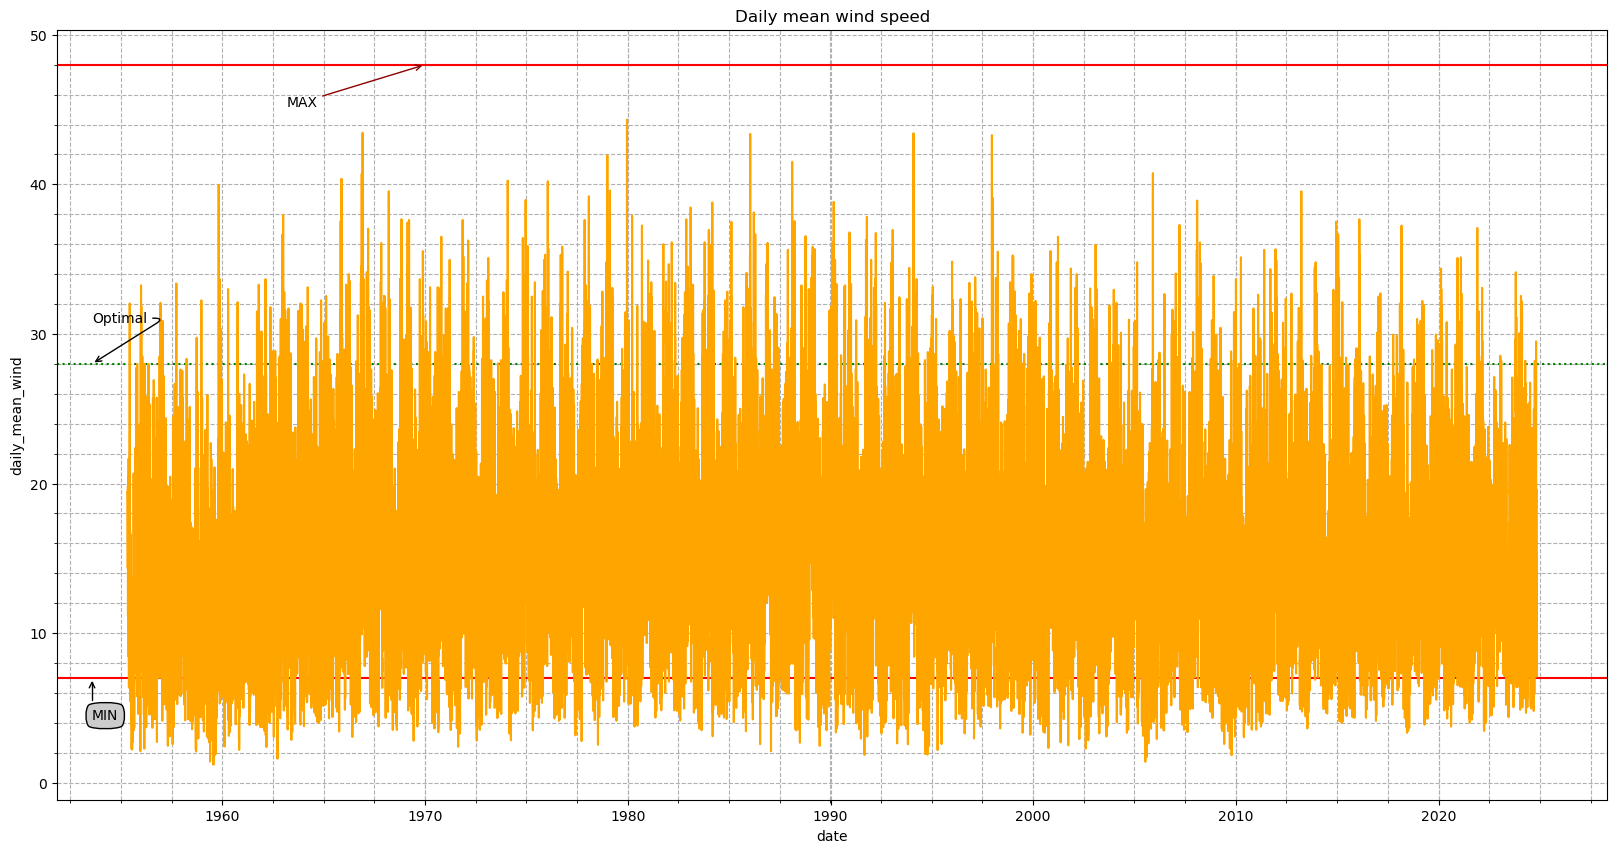

In [13]:
# Add x line representing the maximum wind speed for energy production.
plt.axhline(y = 48, color = 'r', linestyle = '-')

# Add annotation for the maximum wind speed.
plt.annotate("MAX", xy=(0,48), xytext=(-100, -30), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='darkred'))

# Apply grid.
grid()

# Add title.
plt.title("Daily mean wind speed")

# Plot.
sns.lineplot(data=dfwp, x="date", y="daily_mean_wind", color="orange")

The graph shows that it would be possible to produce energy in the past years considering the wind speed in this location. There are some days that the wind speed wasn't enough, but in the majority of the days that would happen, and some days the optimal energy could be reached. None of the days had very high wind speeds, and that indicates that the windmills wouldn't suffer too much damage over time.

### Monthly mean wind speed
In this next plot, I checked the monthly mean wind speed. I used the same codes as above, but this time I selected the months instead of the days. This shows if there could be any month without energy production.

In [14]:
# Calculate the monthly wind speed mean.
monthly_mean_wind = dfwp.groupby(months)["wdsp"].transform("mean")

# Create a new column.
dfwp["monthly_mean_wind"] = monthly_mean_wind

# Check.
dfwp.head(3)

,date,wdsp,daily_mean_wind,monthly_mean_wind
0,1955-05-01 01:00:00,11,19.434783,14.651351
1,1955-05-01 02:00:00,11,19.434783,14.651351
2,1955-05-01 03:00:00,8,19.434783,14.651351


<Axes: title={'center': 'Monthly mean wind speed'}, xlabel='date', ylabel='monthly_mean_wind'>

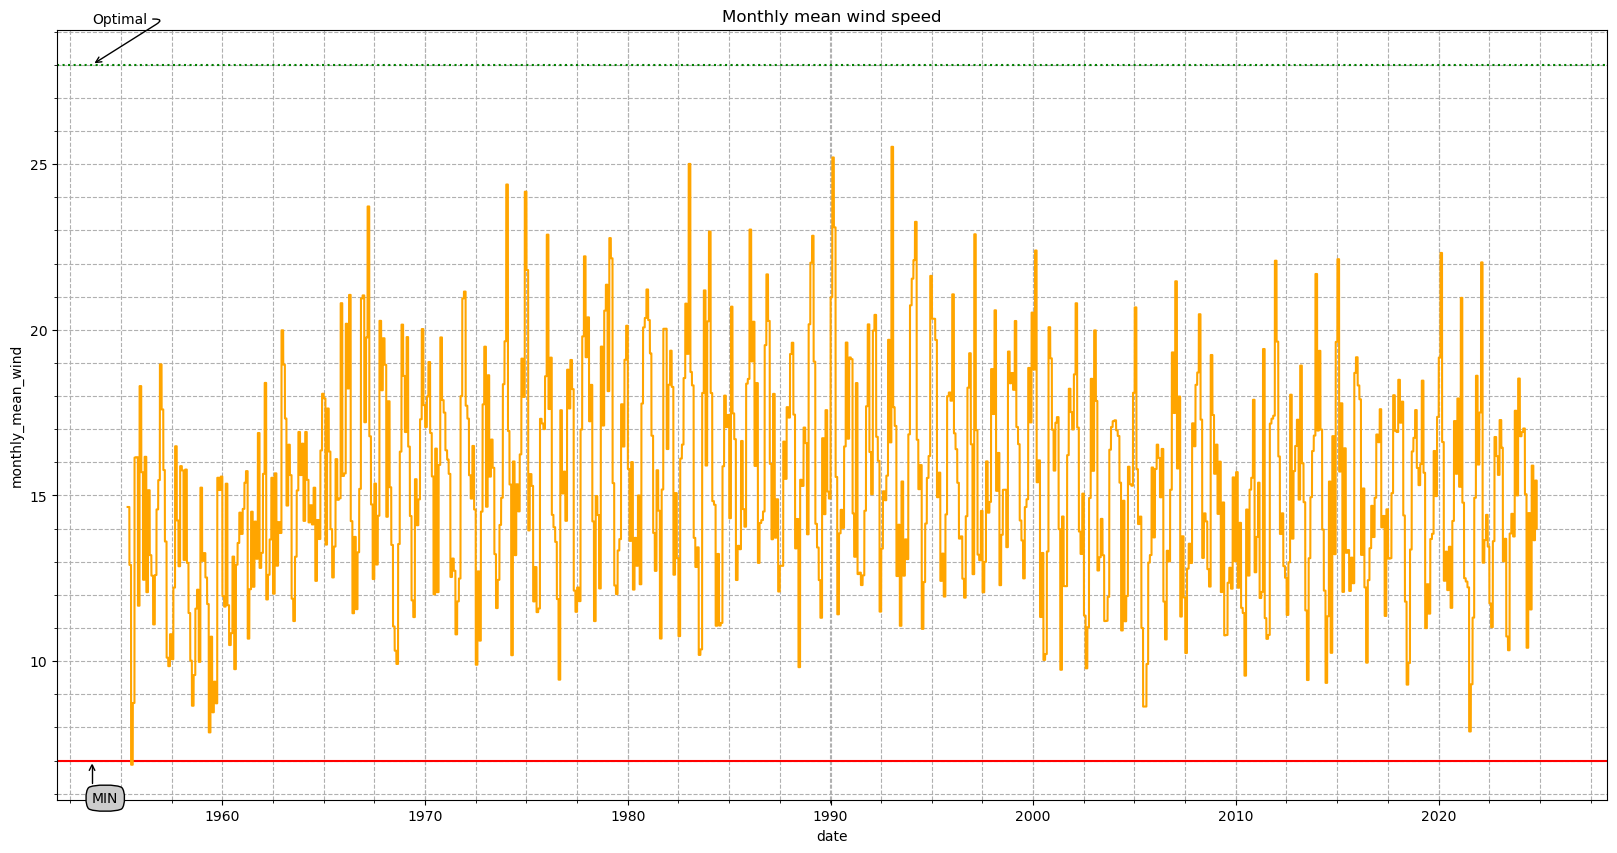

In [15]:
# Add grid.
grid()

# Add title.
plt.title("Monthly mean wind speed")

# Plot.
sns.lineplot(data=dfwp, x="date", y="monthly_mean_wind", color="orange")

The graph shows that there was a month in the 1950s when the wind speed wasn't enough to produce energy. It also shows that none of the months was achieving the optimal wind speed.

### Prediction
#### Next decade
In this part, I made up some data to predict the wind speed in the next 10 years. For this, pd.date_range defines evenly spaced times, and then I used np.random.normal for the machine to create data, considering the mean of the monthly mean wind and the standard deviation, with the size defined in future_dates. Then I made a DataFrame with this new data, with the future dates and wind speeds. Then to compare this new data with the previous data, I used pd.concat to mix both DataFrames.

https://pandas.pydata.org/docs/reference/api/pandas.date_range.html
https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html
https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [16]:
import numpy as np

# Generate future dates.
future_dates = pd.date_range(start="2024-11", periods=10*12, freq="ME")

mean_wind = dfwp["monthly_mean_wind"].mean()
std_wind = dfwp["monthly_mean_wind"].std()

# Generate future wind speed values.
future_wind = np.random.normal(loc=mean_wind, scale=std_wind, size=len(future_dates))

# Create a DataFrame for the hypothetical data.
future_years = pd.DataFrame({
    'date': future_dates,
    'monthly_mean_wind': future_wind
})

# Append the hypothetical data to the original DataFrame.
extended_dfwp = pd.concat([dfwp, future_years])

# Check.
extended_dfwp

,date,wdsp,daily_mean_wind,monthly_mean_wind
0,1955-05-01 01:00:00,11.0,19.434783,14.651351
1,1955-05-01 02:00:00,11.0,19.434783,14.651351
2,1955-05-01 03:00:00,8.0,19.434783,14.651351
3,1955-05-01 04:00:00,18.0,19.434783,14.651351
4,1955-05-01 05:00:00,9.0,19.434783,14.651351
...,...,...,...,...
115,2034-06-30 00:00:00,NaN,NaN,11.480557
116,2034-07-31 00:00:00,NaN,NaN,13.895749
117,2034-08-31 00:00:00,NaN,NaN,22.595265
118,2034-09-30 00:00:00,NaN,NaN,16.795565


<Axes: title={'center': 'Wind speed in the past and future'}, xlabel='date', ylabel='monthly_mean_wind'>

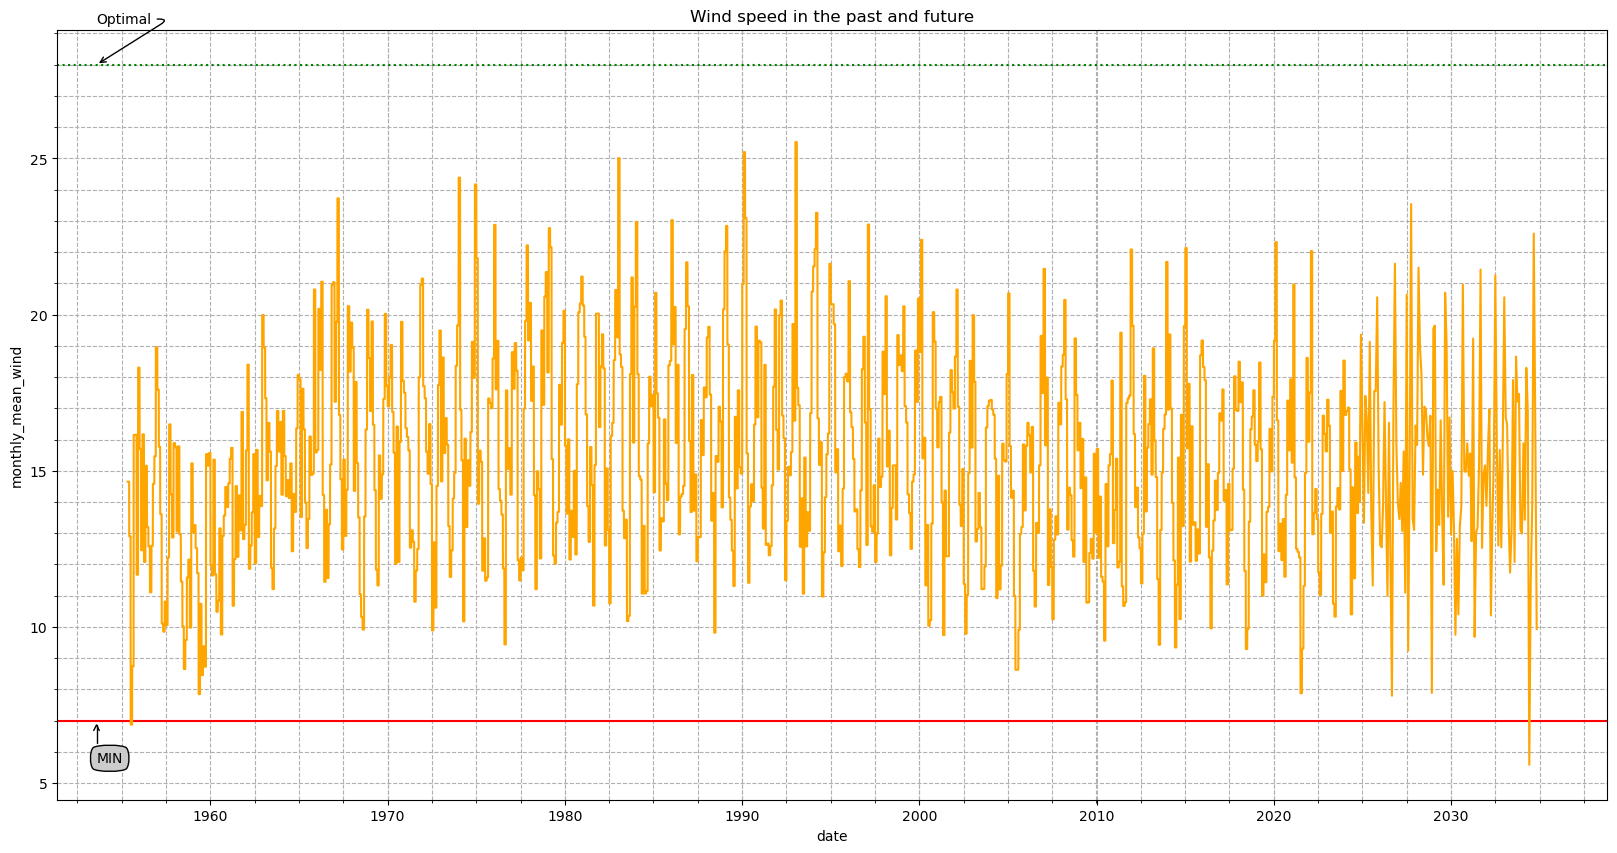

In [17]:
# Apply grid.
grid()

# Add title.
plt.title("Wind speed in the past and future")

# Plot.
sns.lineplot(data=extended_dfwp, x="date", y="monthly_mean_wind", color="orange")

To conclude, the predicted years show a similar trend compared to the previous years.

#### Next week
I applied the same logic to predict the wind speed in the next 7 days. To make the plot precise, I considered only the collected data of daily mean wind speed in November months. 

In [18]:
# Create a column with the months.
dfwp["month"]= dfwp["date"].dt.month

# Generate future dates.
future_week = pd.date_range(start="2024-11-02", periods=7, freq='D')

# Select data from November months.
november= dfwp[(dfwp["month"]==11)]

# Calculate the mean.
n_mean_wind = november["daily_mean_wind"].mean()

# Calculate the standard deviation.
n_std_wind = november["daily_mean_wind"].std()

# Generate future wind speed values.
d_future_wind = np.random.normal(loc=n_mean_wind, scale=n_std_wind, size=len(future_week))

# Create a DataFrame for the hypothetical data.
future_week = pd.DataFrame({
    'date': future_week,
    'daily_mean_wind': d_future_wind
})

# Add generated data to the original DataFrame.
df_filtered = pd.concat([dfwp, future_week])

# Check.
df_filtered

,date,wdsp,daily_mean_wind,monthly_mean_wind,month
0,1955-05-01 01:00:00,11.0,19.434783,14.651351,5.0
1,1955-05-01 02:00:00,11.0,19.434783,14.651351,5.0
2,1955-05-01 03:00:00,8.0,19.434783,14.651351,5.0
3,1955-05-01 04:00:00,18.0,19.434783,14.651351,5.0
4,1955-05-01 05:00:00,9.0,19.434783,14.651351,5.0
...,...,...,...,...,...
2,2024-11-04 00:00:00,NaN,21.301503,NaN,NaN
3,2024-11-05 00:00:00,NaN,13.507156,NaN,NaN
4,2024-11-06 00:00:00,NaN,18.230124,NaN,NaN
5,2024-11-07 00:00:00,NaN,8.047154,NaN,NaN


<Axes: title={'center': 'Future wind speed'}, xlabel='date', ylabel='daily_mean_wind'>

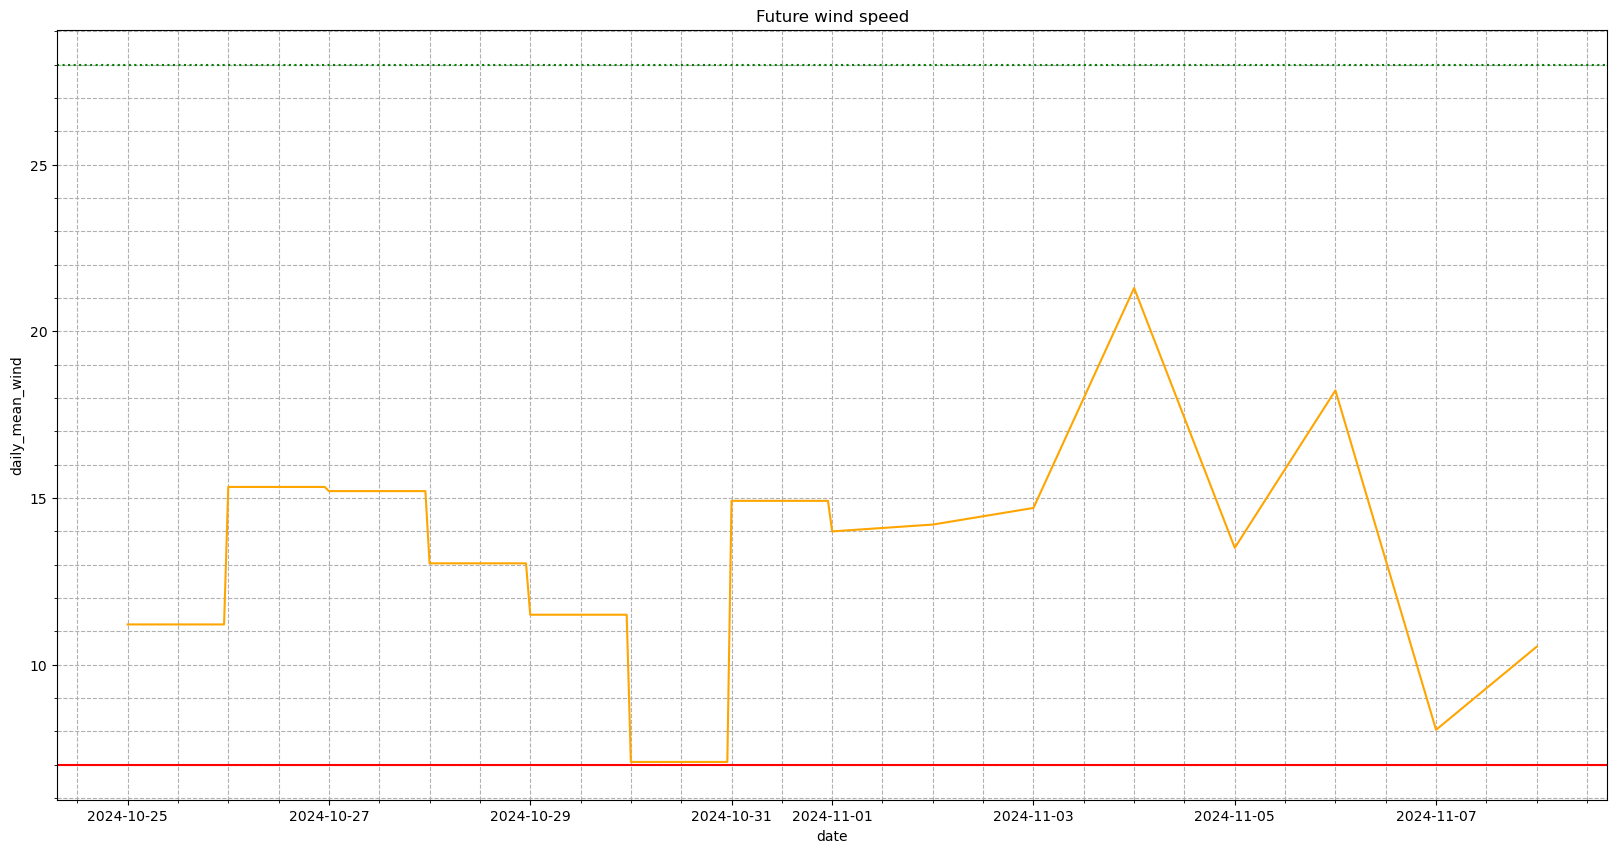

In [19]:
# Add grid and title.
grid()
plt.title("Future wind speed")

# Data of previous week and future week.
df_filtered = df_filtered[(df_filtered['date'] >= '2024-10-25')]

# Plot.
sns.lineplot(data=df_filtered, x="date", y="daily_mean_wind", color="orange")

#sns.lineplot(data=future_week, x="date", y="daily_mean_wind", color="orange")

As shown in the plot, the wind speed in the first week of November is predicted to be high and increasing slightly. This is expected, and I confirmed this tendency in the following plot of monthly mean wind speed each month.

<Axes: title={'center': 'Monthly mean wind speed'}, xlabel='month', ylabel='monthly_mean_wind'>

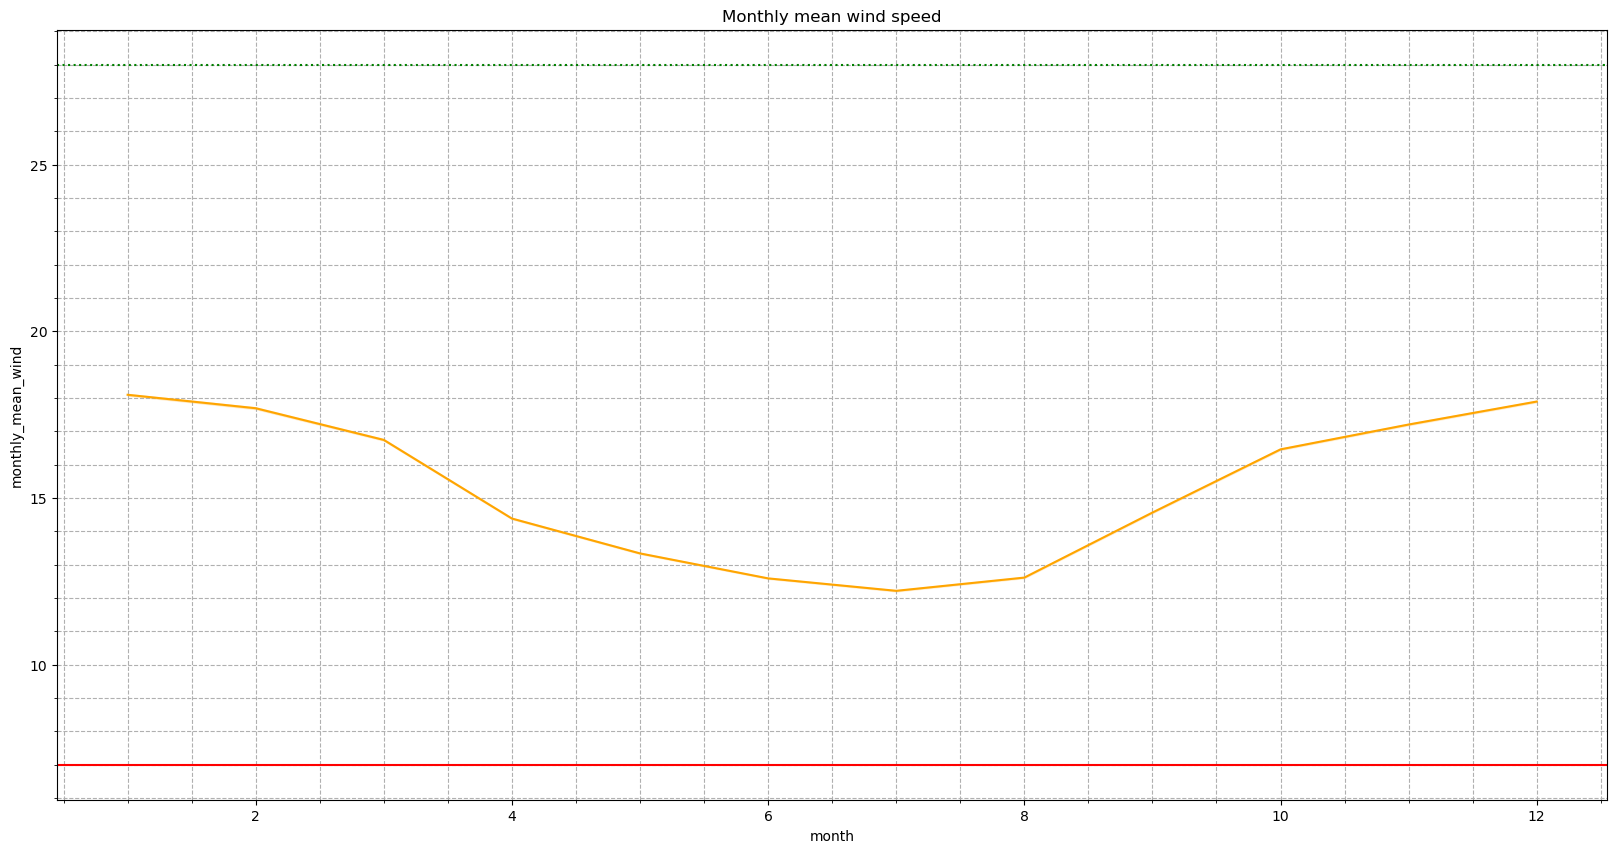

In [20]:
# Apply grid.
grid()

# Add title.
plt.title("Monthly mean wind speed")

# Plot.
sns.lineplot(data=dfwp, x="month", y="monthly_mean_wind", color="orange")

As it shows, the wind speed is usually higher in November, compared with October.

## Windmills

https://malinheadoffshorewind.ie/environment
https://malinheadoffshorewind.ie/about-project
https://malinheadoffshorewind.ie/

The Malin Head area shows potential for energy production as the wind speeds are usually sufficient for most years. I searched if there are any plans to introduce windmills in this location and I found a project, Source Galileo, that plans the construction of a wind farm in Malin Head offshore. This project will support the Irish Government’s Climate Action Plan, aiming for an energy production of up to 1000 Megawatts, providing an estimated power for 850,000 households annually.

The project is based on Malin Head offshore and the data collected in this DataFrame was taken on land. The conditions probably differ a bit but this data can already give a good indication of the potential of this area for energy production. I calculated the hypothetical energy production for each windmill, with the following equation:

https://www.geeksforgeeks.org/wind-energy-formula/


$P = 1/2 x ρ x A x v^3$

- $P = Power (W)$
- $ρ = Density  (kg/m^3)$
- $A = Swept Area  (m^2)$
- $v = Wind Speed  (m/s)$

After that, I considered the standard density of air, which is equal to $1.225 kg/m^3$.
https://www.e-education.psu.edu/emsc297/node/649

Then for the swept area, I needed to set the dimensions of the wind turbines. The European Wind Energy Association indicates that most wind turbine blades are around 50 meters in length.
https://www.ewea.org/wind-energy-basics/faq/#:~:text=How%20big%20is%20a%20wind,than%201%2C500%20average%20EU%20households

With this measurement, it's now possible to calculate the swept area of the turbine, with the following equation: $A = π × r^2 = π x 50^2= 7854 m^2$
https://mmpa.org/wp-content/uploads/2015/09/Swept-Area-Provided-by-Kid-Wind-PDF.pdf

The wind speed in this DataFrame is in knots, so I converted these values into miles per second in order to apply the energy production formula. The conversion is 1 knot = 0.51444 m/s.
https://en.wikipedia.org/wiki/Knot_(unit)

Before making this conversion, I filtered the wind speeds that don't produce any energy, so I didn't consider the values that are lower than 7 knots and higher than 48.
https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/pandas-dataframes/indexing-filtering-data-pandas-dataframes/

In [21]:
# print(max(dfwp["wdsp"]))
# https://realpython.com/python-min-and-max/#calling-min-and-max-with-a-single-iterable-argument

In [22]:
# Drop wind speeds that are lower than 7 knots.
dfwp = dfwp[dfwp["wdsp"] > 7]

# Drop the wind speeds that are higher than 48 knots.
dfwp = dfwp[dfwp["wdsp"] < 48]

So after selecting only the wind speeds that produce energy, I converted these into the miles per second. After that, I finally applied the formula representing the energy production divided by 1000, to get it in kilowatts, as 1 kW = 1000 W.

In [23]:
# Convert knots into miles per second.
dfwp["wdsp_ms"]= dfwp["wdsp"]* 0.51444

# Calculate energy produced in kilowatts.
dfwp["power_kw"]=(0.5*1.225*7854*dfwp["wdsp_ms"]**3)/1000

# Show the data.
dfwp

,date,wdsp,daily_mean_wind,monthly_mean_wind,month,wdsp_ms,power_kw
0,1955-05-01 01:00:00,11,19.434783,14.651351,5,5.65884,871.724464
1,1955-05-01 02:00:00,11,19.434783,14.651351,5,5.65884,871.724464
2,1955-05-01 03:00:00,8,19.434783,14.651351,5,4.11552,335.329020
3,1955-05-01 04:00:00,18,19.434783,14.651351,5,9.25992,3819.607118
4,1955-05-01 05:00:00,9,19.434783,14.651351,5,4.62996,477.450890
...,...,...,...,...,...,...,...
609283,2024-10-31 20:00:00,12,14.916667,15.448925,10,6.17328,1131.735442
609284,2024-10-31 21:00:00,13,14.916667,15.448925,10,6.68772,1438.902064
609285,2024-10-31 22:00:00,13,14.916667,15.448925,10,6.68772,1438.902064
609286,2024-10-31 23:00:00,14,14.916667,15.448925,10,7.20216,1797.153966


### Daily mean power production
In this next section, I calculated the daily mean power produced, using again the codes .groupby and .transform. Then I created a new column with those values.

In [24]:
# Calculate the daily mean power.
daily_mean_power = dfwp.groupby(days)["power_kw"].transform("mean")

# Create a new column.
dfwp["daily_mean_power"] = daily_mean_power

After that, I plotted the energy generated in 4 different years, with 20 years apart from each other to see if there's a similar tendency. For this, I created a new variable with the years to check. Then I used a dictionary, df_year, to select all the data from those years. Then I set a figure to show 4 plots, with a 2x2 layout and chosen size. After that, I created a for function that outputs each year in one subplot, with added title and axes labels. Finally, I used plt.tight_layout to prevent the title and the axes labels from being too close to each other, which will make the plot cleaner.

https://www.kaggle.com/code/vascodegama/automated-seaborn-plot-functions
https://engineeringfordatascience.com/posts/matplotlib_subplots/#method-1-ravel
https://napsterinblue.github.io/notes/python/viz/subplots/
https://stackoverflow.com/questions/71160580/how-do-i-use-a-for-loop-and-the-zip-function-to-plot-subplots-in-python
https://aeturrell.github.io/coding-for-economists/vis-matplotlib.html
https://stackoverflow.com/questions/72040648/how-to-fix-the-plot-using-iteration-through-the-subplots
https://stackoverflow.com/questions/71160580/how-do-i-use-a-for-loop-and-the-zip-function-to-plot-subplots-in-python

https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

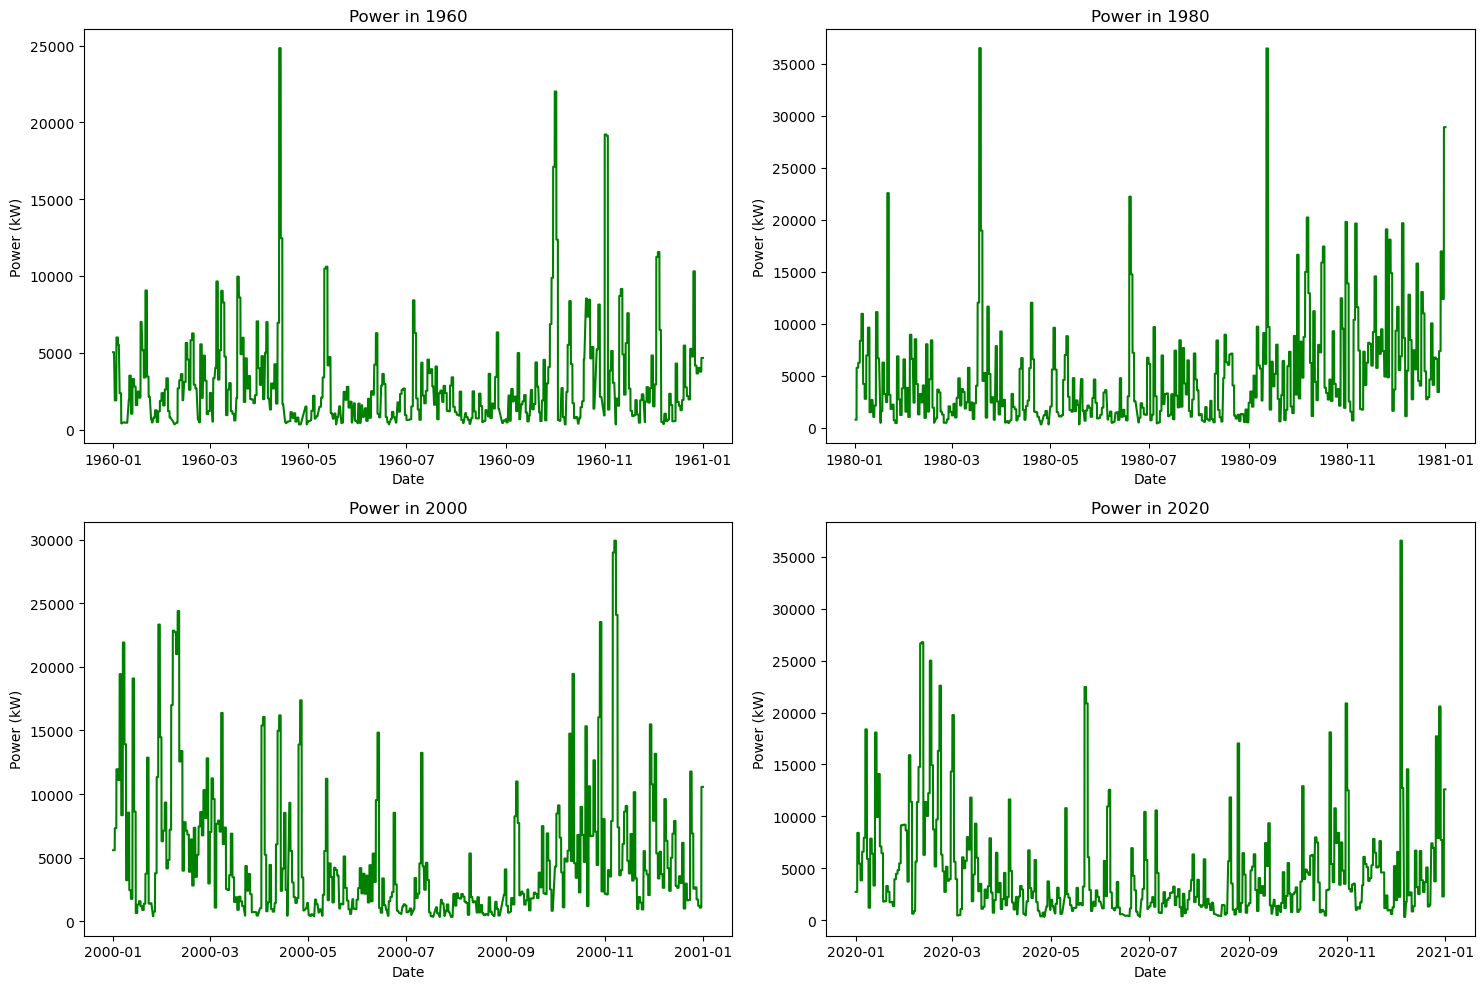

In [25]:
# Years to check.
years = [1960, 1980, 2000, 2020]

# Filter the DataFrame for the specified years.
df_year = {year: dfwp[dfwp["date"].dt.year == year] for year in years}

# Create subplots for each year.
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Create a line plot for each year.
for ax, year in zip(axs.flatten(), years):
    sns.lineplot(x="date", y="daily_mean_power", data=df_year[year], ax=ax, color="green")
    ax.set_title(f"Power in {year}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Power (kW)")

# Adjust layout.
plt.tight_layout()

It's visible that in both years, the energy production in generally higher after September, and also rentable at the beginning of the year, before May. The worst months are in the middle of the year, between May and September.

Considering the  Source Galileo project, the estimate of 1 000 MW energy production could be achieved in all of the 4 years, where the input of 1 windmill is higher than 15 000 kW, and if there were 67 wind turbines in total:

$1 000 MW = 1 000 000 kW$

$1 000 000 kW : 15 000 kW ≈ 67$ turbines

https://www.unitconverters.net/power/kilowatt-to-megawatt.htm
https://malinheadoffshorewind.ie/about-project

## Wind Speed VS Power
The higher the wind speed, the higher the power production. To confirm this, I plotted both variables side by side. Since I wanted a resumed plot, I considered only the monthly means. For this, I calculated the monthly mean power produced and added a new column. Then, I created a new DataFrame with the years of the last decade, from 2014 till now. I defined each plot with seaborn and added a label on the y axis for each variable. The plt.twinx() mixed both plots, sharing the x axis. Then, I defined the title, the label for the x axis, legend and plotted.

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html 

In [26]:
# Calculate the monthly mean power.
monthly_mean_power = dfwp.groupby(months)["power_kw"].transform("mean")

# Create a new column.
dfwp["monthly_mean_power"] = monthly_mean_power

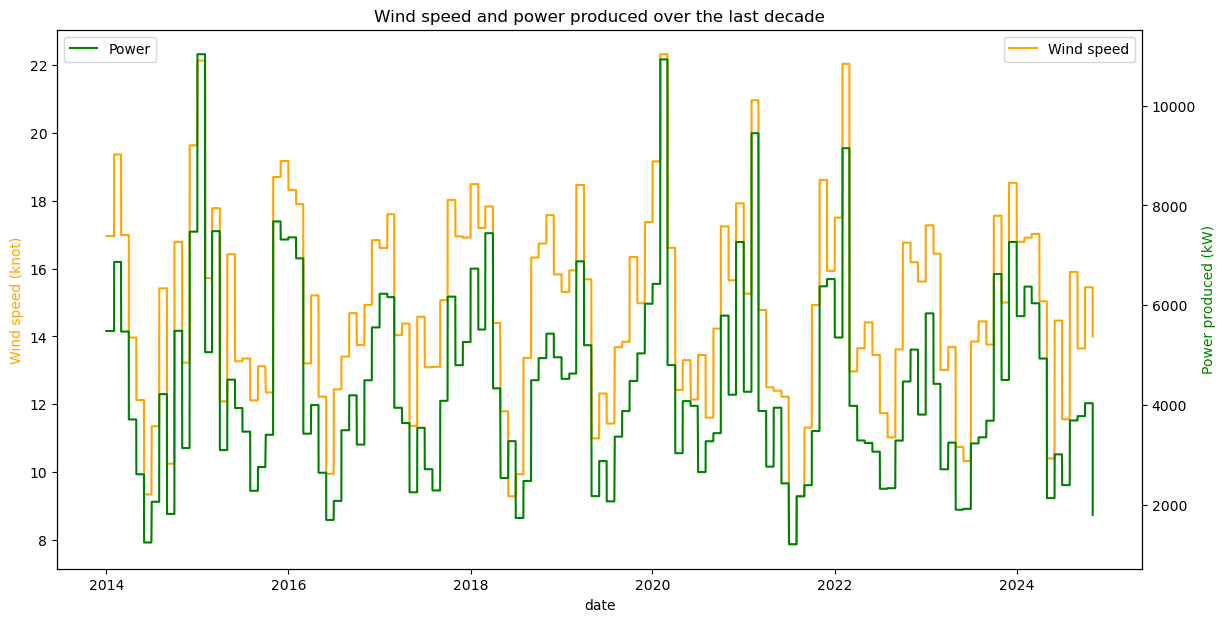

In [27]:
# Last decade.
#dfdec=dfwp
dfdec = dfwp[dfwp["date"].dt.year >=2014]

# Set figure.
plt.figure(figsize=(14, 7))

# Plot for wind speed.
sns.lineplot(x="date", y="monthly_mean_wind", data=dfdec, label="Wind speed", color="orange")

# Label for wind speed.
plt.ylabel("Wind speed (knot)", color="orange")

# Create a twin Axes sharing the x-axis for 'temp'
ax2 = plt.twinx()

# Plot for power.
sns.lineplot(x="date", y="monthly_mean_power", data=dfdec, label="Power", color="green", ax=ax2)

# Label for power.
ax2.set_ylabel("Power produced (kW)", color="green")

# Add title.
plt.title("Wind speed and power produced over the last decade")

# Add x label.
plt.xlabel("Date")

# Add legend.
plt.legend(loc="upper left")


As expected, both plots show similar trends, but they're not completely the same either. For example, at the start of the years 2014 and 2018, the power produced was similar, but the wind speed was higher in 2014. Also, at the start of the years 2020 and 2022, it's highly visible that wind speed is almost the same, but the power generated was way lower in 2022.

### Correlation and regression
In this section, I calculated the correlation of the energy produced, considering each month. The correlation is equal to -0.073, which shows a weak correlation, which is why the regression line is convex. This result was expected because previous plots showed that the months in the middle of the year had the lowest energy production.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
https://seaborn.pydata.org/generated/seaborn.set_style.html
https://seaborn.pydata.org/generated/seaborn.lmplot.html

Power correlation per month is: -0.0732098822623549


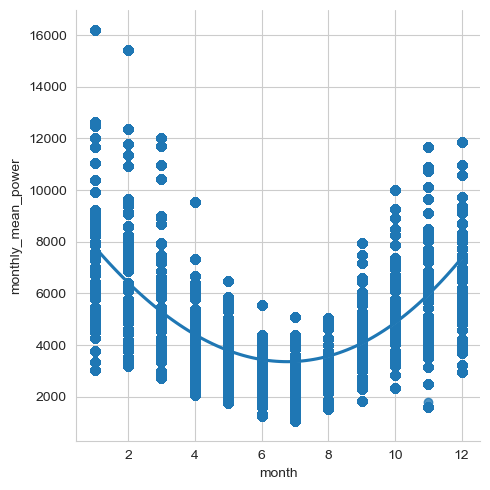

In [28]:
# Create a column with the months.
#dfwp["month"]= dfwp["date"].dt.month

# Calculate the correlation between month and wind speed, and print.
corrwind = dfwp["month"].corr(dfwp["monthly_mean_power"], method="pearson")
print (f"Power correlation per month is: {corrwind}")

# Set grid style.
sns.set_style("whitegrid")

# Define plot.
sns.lmplot(x="month", y="monthly_mean_power", order=3, data=dfwp)

Temperature correlation per month is: 0.9399245747925266


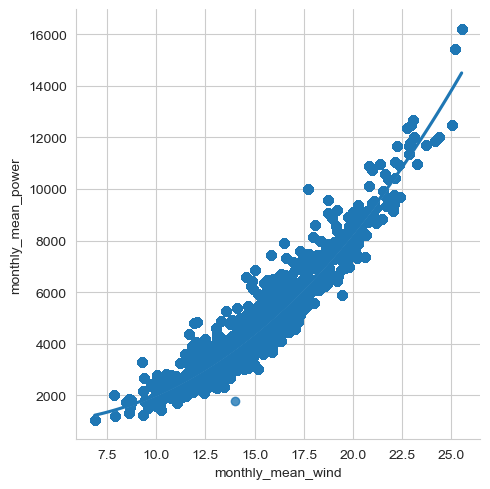

In [29]:
corrtemp = dfwp["monthly_mean_wind"].corr(dfwp["monthly_mean_power"])

print(f"Temperature correlation per month is: {corrtemp}")

# Set grid style.
sns.set_style("whitegrid")

# Define plot.
sns.lmplot(x="monthly_mean_wind", y="monthly_mean_power", order=3, data=dfwp)

#### Scikit-Learn
Scikit-Learn "It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python"

https://www.tutorialspoint.com/scikit_learn/scikit_learn_introduction.htm

##### K Neighbors
I applied some of the scikit-learn features, in this case, the K-Nearest Neighbors. This method enables the classification and predictions in a certain data point. 

https://www.ibm.com/think/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20(KNN)%20algorithm%20is%20a%20non,used%20in%20machine%20learning%20today.

Then I applied the training machine learning model, where the data is split into training and test data.

https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn#normalizing-&-splitting-the-data-whent

Then the StandardScaler will make the features in X with standard values, with normalization of data, so none of them will be too apart from each other.
https://www.geeksforgeeks.org/what-is-standardscaler/

The .fit_transform fits the X train with the standard deviation values.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform

Then the .transform fits the X test values with the same mean and variance from the training data.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.transform
https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

After this, I can finally train the model with KNeighborsClassifier, fitting the training data with .fit.
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit

Then I calculated the prediction of y with .predict, considering the X test. 
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict

After that, I calculated the efficacy of this K-Nearest Neighbors method with the accuracy_score, as this shows how many values the machine was able to predict correctly.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

https://scikit-learn.org/1.5/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py
https://www.askpython.com/python/examples/python-predict-function

In [30]:
# Import libraries.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features X.
x = dfwp[["daily_mean_power", "monthly_mean_power"]]

# Define target y.
y = dfwp["month"]

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(x, y)

# Standardize the features.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.metrics import accuracy_score

# Initialize the KNN classifier.
knn = KNeighborsClassifier()

# Train the model.
knn.fit(X_train, y_train)

# Make predictions.
y_pred = knn.predict(X_test)

# Evaluate the model.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.78%


In [31]:
'''
clf = KNeighborsClassifier()

x = dfwp[['month', "wdsp"]]
y = dfwp['month']

clf = clf.fit(x, y)
print(clf.score(x,y))
'''

'\nclf = KNeighborsClassifier()\n\nx = dfwp[[\'month\', "wdsp"]]\ny = dfwp[\'month\']\n\nclf = clf.fit(x, y)\nprint(clf.score(x,y))\n'

##### Linear Regression

In the next part, I did a simple linear regression with scikit-lear, with the steps demonstrated by Real Python. For this, I imported NumPy library and the package LinearRegression from sklearn, then I identified the regressors x and the response y. The x must be two-dimensional, so I used .reshape to convert it. After that, I implemented a model that uses a LinearRegression. Then I applied this model to the data with .fit. Then to evaluate if the model is adequate, the printed .score shows how accurate the model can be. Then .predict shows the most predictable numbers in the response.

https://www.w3schools.com/python/numpy/numpy_array_reshape.asp
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn

In [32]:
# Import libraries
import numpy as np
from sklearn.linear_model import LinearRegression

# The regressors.
x = np.array(dfwp["monthly_mean_wind"]).reshape((-1, 1))

# The response.
y = dfwp["monthly_mean_power"]

# Linear regression model.
model = LinearRegression()

# Fit model in the parameters.
model = LinearRegression().fit(x, y)

# Score the model and print.
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
#print(f"intercept: {model.intercept_}")
#print(f"coefficients: {model.coef_}")

# Show predictions.
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

coefficient of determination: 0.8834582062991506
predicted response:
[4430.53481151 4430.53481151 4430.53481151 ... 4984.95345562 4984.95345562
 3977.75975383]


The linear regression can also be plotted. For this, I used the train_test_spilt model in the arrays x and y, as used above. Then, I splitted both into training and testing sets, with test_size showing the size of the test set and random_state representing the seed that controls randomization. 

Then, I fitted the Linear Regression model in the training set and made predictions in the testing set.

Finally, I used Matplotlib to create a figure, with a scatter of the testing set and a line with the predictions.

https://scikit-learn.org/1.5/auto_examples/linear_model/plot_ols.html
https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html
https://realpython.com/train-test-split-python-data/
https://scikit-learn.org/1.5/glossary.html#term-random_state

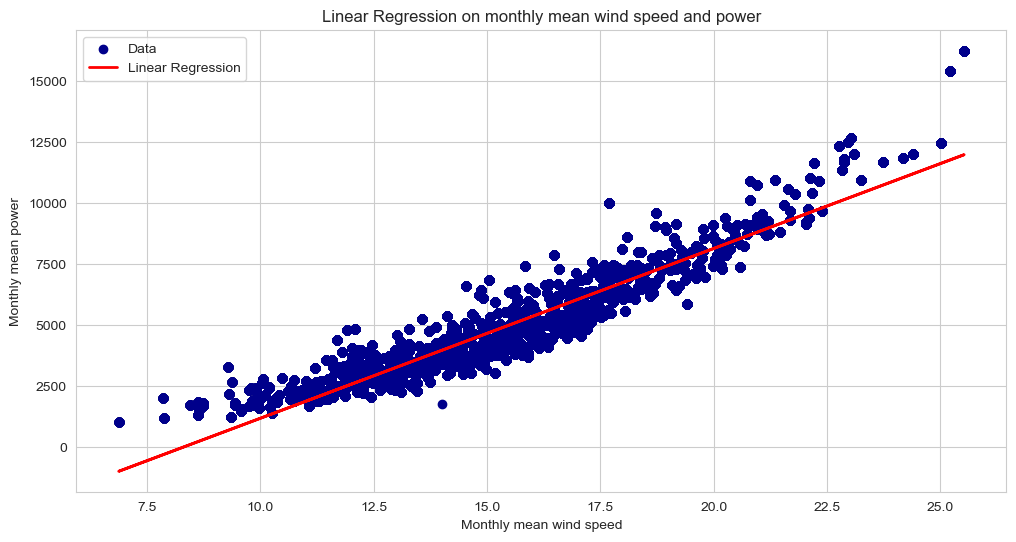

In [33]:
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression

# Data, inputs.
x = np.array(dfwp["monthly_mean_wind"]).reshape((-1, 1))

# Target, outputs.
y = dfwp ["monthly_mean_power"]

# Split the arrays into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Fit the train in the Linear Regression model.
model = LinearRegression().fit(X_train, y_train)

#print(model.score(X_train, y_train))
#print(model.score(X_test, y_test))

# Prediction.
y_pred = model.predict(X_test)

# Plot the data and the regression line
plt.figure(figsize=(12, 6))

plt.scatter(X_test, y_test, color="darkblue", label="Data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Linear Regression")

# Add titles and labels
plt.title("Linear Regression on monthly mean wind speed and power")
plt.xlabel("Monthly mean wind speed")
plt.ylabel("Monthly mean power")
plt.legend()

# Show the plot
plt.show()

#### Scatter
In the next plot, I will do a scatter with the wind speed over time, with each value also including information of the power.

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: title={'center': 'Monthly mean of Wind speed and power produced over the years'}, xlabel='date', ylabel='monthly_mean_wind'>

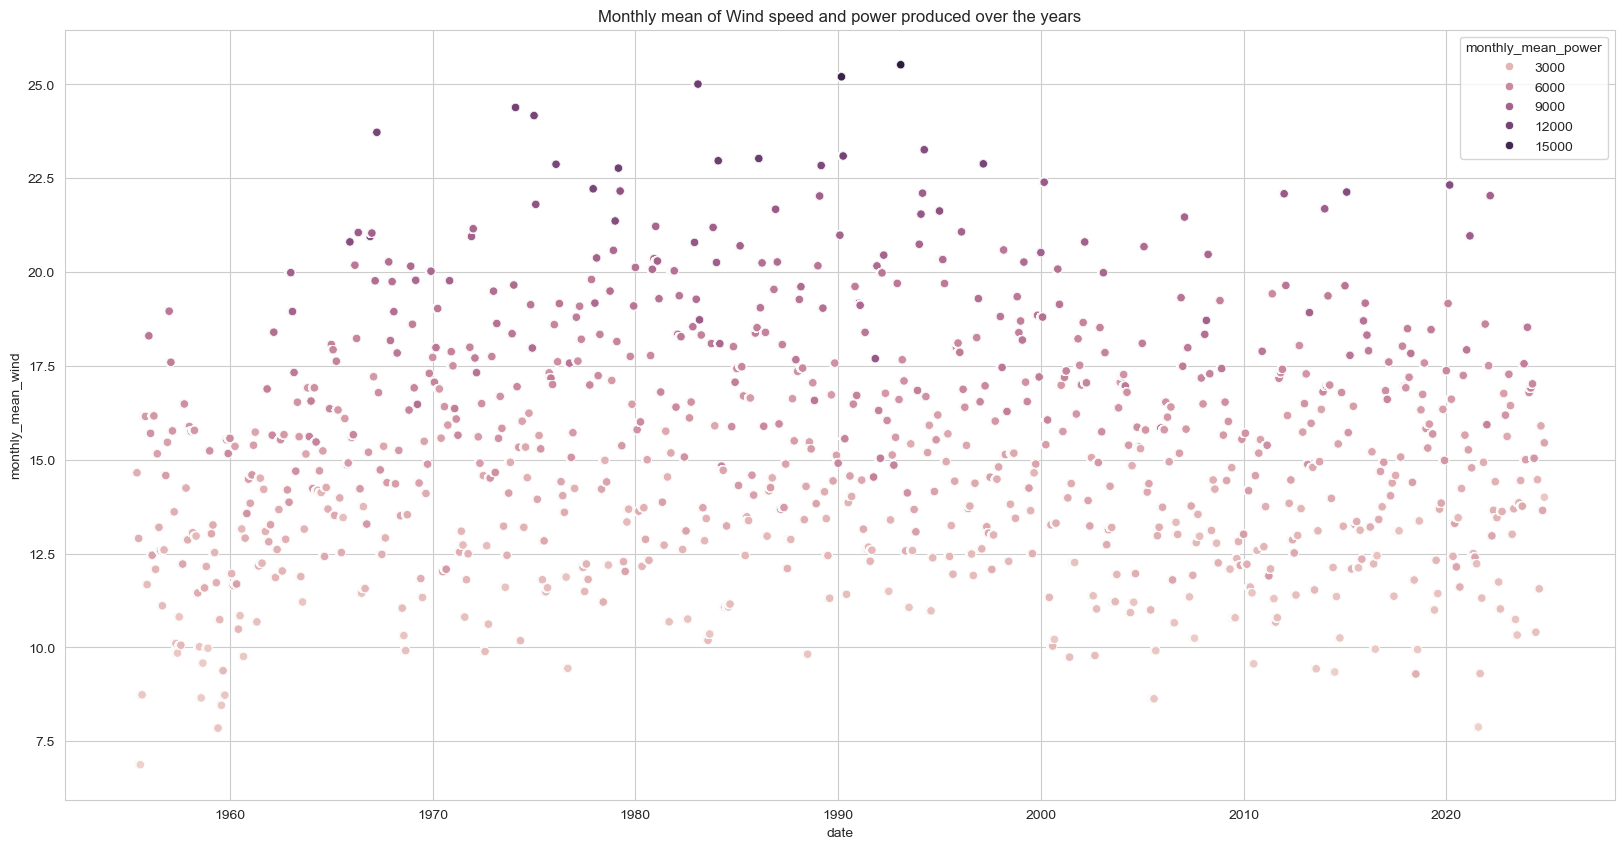

In [34]:
plt.title("Monthly mean of Wind speed and power produced over the years")

sns.scatterplot(x=dfwp["date"],y=dfwp["monthly_mean_wind"], hue=dfwp["monthly_mean_power"])

#sns.scatterplot(x=dfwp["monthly_mean_power"],y=dfwp["monthly_mean_wind"], hue=dfwp["month"])

This scatter also confirms that the higher the wind speed, the higher the power generated. The darker points representing the high monthly mean power are usually located at the top, where the wind speeds are higher too.

## Rain, temperature and humidity.
There is other variables that are worth to analyse, for example the rain, temperature and humidity. The rain represents the precipitation amount in millimetres, the temperature is in Celcius and the humidity in %.
Before using this data, I cleaned it in the same way as previously done for "date" and "wdsp", applying the same codes.

In [35]:
df_rth=df[["date","rain", "temp", "rhum"]]

df_rth["rain"] = pd.to_numeric(df_rth["rain"], errors="coerce")
df_rth["rhum"] = pd.to_numeric(df_rth["rhum"], errors="coerce")

# Drop the empty and 0 values.
df_rth = df_rth[df_rth["rain"] != " "]
df_rth = df_rth[df_rth["rain"] != 0]
df_rth = df_rth[df_rth["temp"] != " "]
df_rth = df_rth[df_rth["rhum"] != " "]

C:\Users\amand\AppData\Local\Temp\ipykernel_12724\1379251758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rth["rain"] = pd.to_numeric(df_rth["rain"], errors="coerce")
C:\Users\amand\AppData\Local\Temp\ipykernel_12724\1379251758.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rth["rhum"] = pd.to_numeric(df_rth["rhum"], errors="coerce")


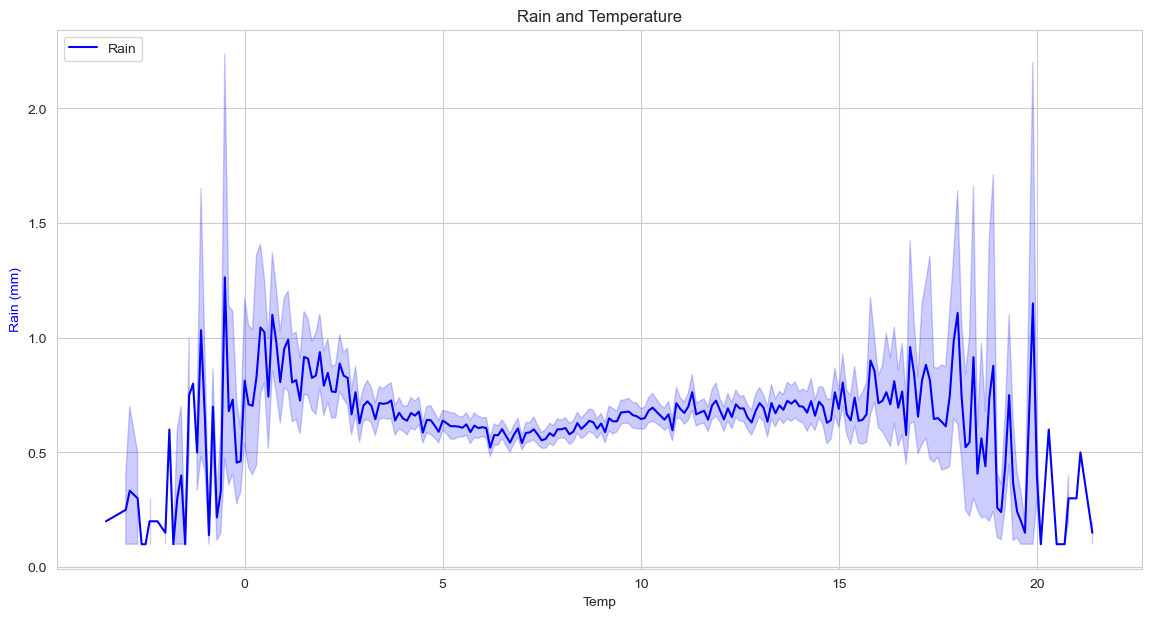

In [36]:
# Plot the data using seaborn
plt.figure(figsize=(14, 7))

# Plot.
sns.lineplot(x='temp', y='rain', data=df_rth, label='Rain', color='blue')

plt.ylabel('Rain (mm)', color='blue')

# Add titles and labels
plt.title('Rain and Temperature')
plt.xlabel('Temp')
plt.legend(loc='upper left')
plt.show()

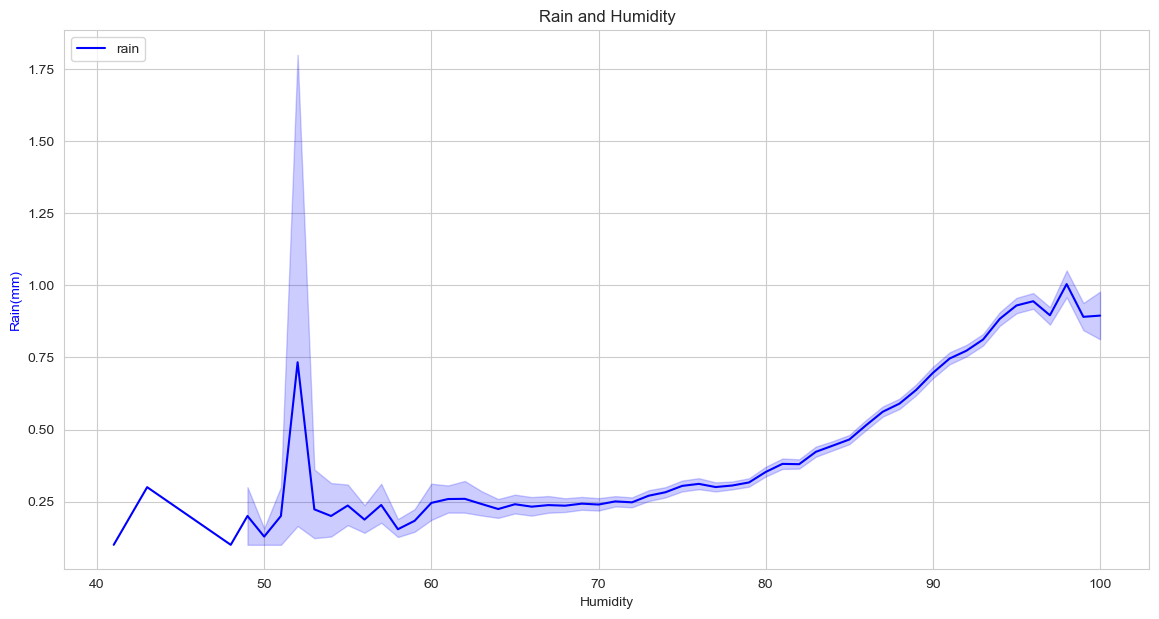

In [37]:
#Plot the data using seaborn
plt.figure(figsize=(14, 7))

# Plot
sns.lineplot(x='rhum', y='rain', data=df_rth, label='rain', color='blue')
plt.ylabel('Rain(mm)', color='blue')

# Add titles and labels
plt.title('Rain and Humidity')
plt.xlabel('Humidity')
plt.legend(loc='upper left')
plt.show()


To summarize the data, I calculated the monthly means for the 3 variables. Then to visualize, I created a plot with a line and a histogram, representing the temperature and the rain respectively, along the months.

https://seaborn.pydata.org/generated/seaborn.histplot.html

In [38]:
# Calculate the daily wind speed mean.
monthly_mean_rain = df_rth.groupby(months)["rain"].transform("mean")
monthly_mean_temp = df_rth.groupby(months)["temp"].transform("mean")
monthly_mean_hum = df_rth.groupby(months)["rhum"].transform("mean")

# Create a new column.
df_rth["monthly_mean_rain"] = monthly_mean_rain
df_rth["monthly_mean_temp"] = monthly_mean_temp
df_rth["monthly_mean_hum"] = monthly_mean_hum

# Check
df_rth.head()

,date,rain,temp,rhum,monthly_mean_rain,monthly_mean_temp,monthly_mean_hum
5,1955-05-01 06:00:00,0.1,8.4,91.0,0.483448,8.049655,88.848276
7,1955-05-01 08:00:00,0.1,9.2,88.0,0.483448,8.049655,88.848276
8,1955-05-01 09:00:00,0.2,9.3,84.0,0.483448,8.049655,88.848276
9,1955-05-01 10:00:00,1.1,8.8,89.0,0.483448,8.049655,88.848276
10,1955-05-01 11:00:00,3.0,8.3,91.0,0.483448,8.049655,88.848276


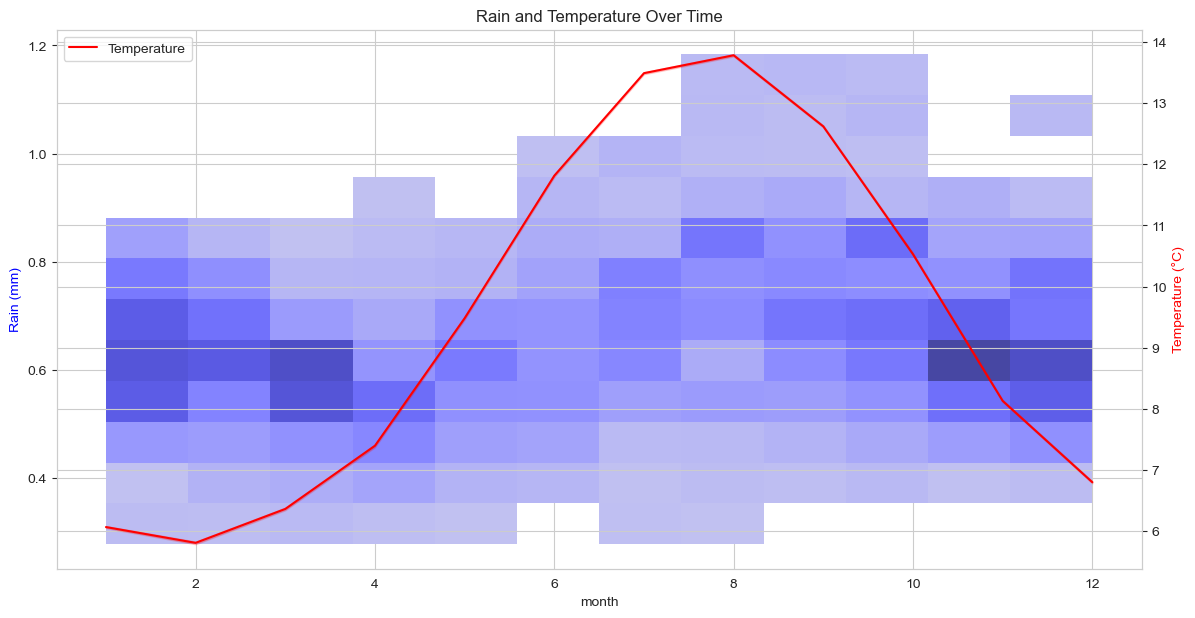

In [39]:
# Plot the data using seaborn
plt.figure(figsize=(14, 7))

# Plot rain
#sns.lineplot(x=dfwp['month'], y=df_rth['monthly_mean_rain'], data=df_rth, label='Rain', color='blue')
sns.histplot(x=dfwp['month'], y=df_rth['monthly_mean_rain'], bins=12, color='blue')

plt.ylabel('Rain (mm)', color='blue')

# Create a twin Axes sharing the x-axis for 'temp'
ax2 = plt.twinx()

# Plot for temperature
#sns.histplot(x=dfwp['month'], y='monthly_mean_temp', data=df_rth, label='Temperature', color='red', ax=ax2)
sns.lineplot(x=dfwp['month'], y=df_rth['monthly_mean_temp'], label='Temperature', color='red', ax=ax2)

ax2.set_ylabel('Temperature (°C)', color='red')

# Add titles and labels
plt.title('Rain and Temperature Over Time')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()


The precipitation amount of rain is usually more frequent between 0.4 mm and 0.8 mm, when the temperature is between 7 and 11 C. Rain is less common when temperatures and below or higher. Also, the rain is common all year round, but more frequent between January and April and September and December. The histogram area is bigger during the summer, and the amount of rain is not as consistent, as it can rain very little or a lot.

For the temperature, usually the coldest month is February and the hottest is August.

For the next observation, I checked the temperature in 3 different decades, to see if it's the tendency was similar.

https://www.datacamp.com/tutorial/python-seaborn-line-plot-tutorial

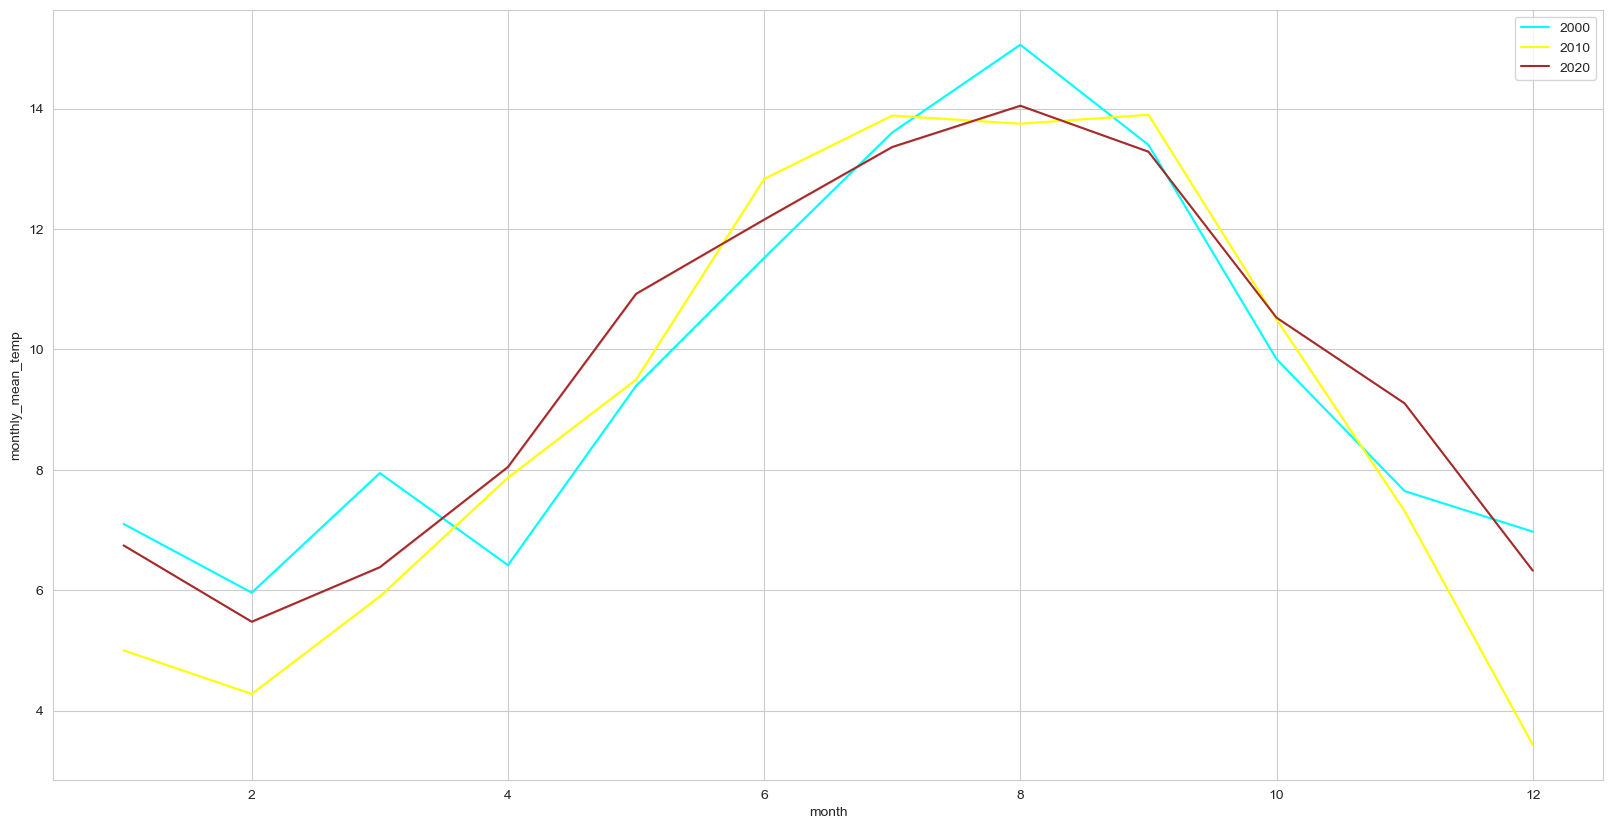

In [40]:
# Create a column with the months.
#df_rth["year"]= df_rth["date"].dt.year

df_rth00 = df_rth[df_rth["date"].dt.year ==2000]
df_rth10 = df_rth[df_rth["date"].dt.year ==2010]
df_rth20 = df_rth[df_rth["date"].dt.year ==2020]


# Subplot for 'rain'
sns.lineplot(x=dfwp["month"], y=df_rth00['monthly_mean_temp'], color='cyan', label="2000")
sns.lineplot(x=dfwp["month"], y=df_rth10['monthly_mean_temp'], color='yellow', label="2010")
sns.lineplot(x=dfwp["month"], y=df_rth20['monthly_mean_temp'], color='brown', label="2020")

plt.show()

The graph shows that the temperature was similar in both years, with the temperature matching the tendency to increase and decrease during the months. There are some differences too, for example, the coldest month in 2020 and 2000 was February but in 2010 was December. Then, the hottest month in both 2020 and 2000 was August, and in 2010 both July and September months were considered the hottest.

To evaluate the 3 variables closely, I created a figure with the 3 plots side by side, from the year 2020 onwards. 

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
https://matplotlib.org/stable/users/explain/axes/arranging_axes.html#low-level-and-advanced-grid-methods

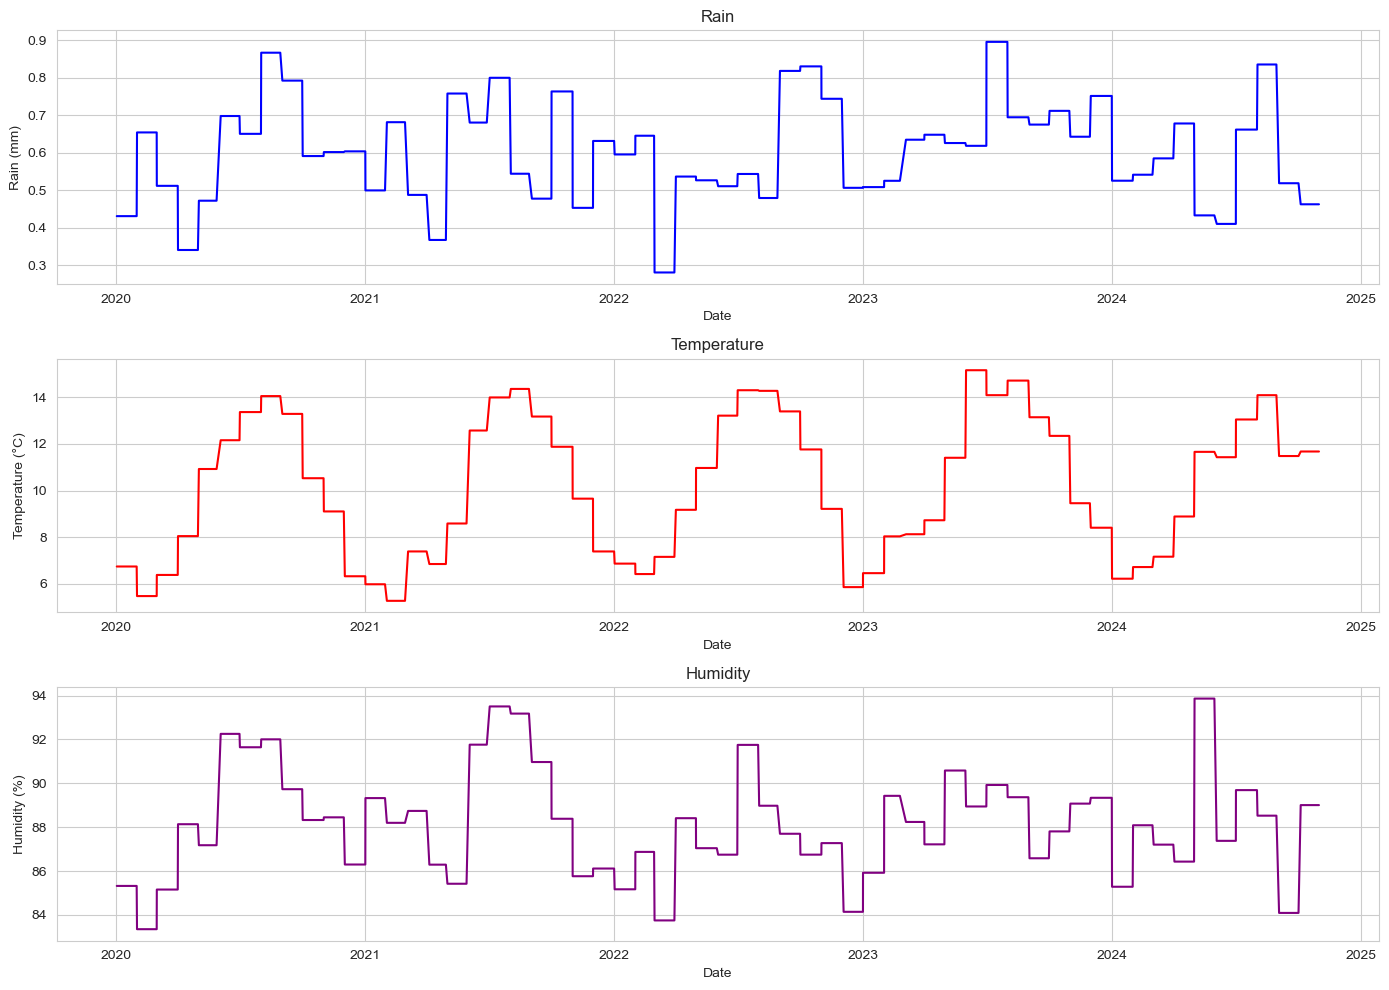

In [41]:
# Create subplots for a cleaner visual
fig, ax = plt.subplots(3, 1, figsize=(14, 10))

dfdec=df_rth
dfdec = df_rth[df_rth["date"].dt.year >=2020]

# Subplot for 'rain'
sns.lineplot(x='date', y='monthly_mean_rain', data=dfdec, ax=ax[0], color='blue')
ax[0].set_title('Rain')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Rain (mm)')

# Subplot for 'temp'
sns.lineplot(x='date', y='monthly_mean_temp', data=dfdec, ax=ax[1], color='red')
ax[1].set_title('Temperature')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Temperature (°C)')

sns.lineplot(x='date', y='monthly_mean_hum', data=dfdec, ax=ax[2], color='purple')
ax[2].set_title('Humidity')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Humidity (%)')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

The precipitation amount of rain was higher in 2023 and 2024. 
The temperature is similar in all the years. 
The humidity % was lower and more consistent in 2023, and higher in 2021 all year round. The higher peak of humidity was in 2024, but then it dropped a lot after that.

In the next step, I calculate the correlation between the variables, to analyse if it's worth establishing a relation between any of them.

In [42]:
# Correlation.
''''
corrtemp = df_rth["temp"].corr(df_rth["rain"])
raintemp= df_rth["monthly_mean_temp"].corr(df_rth["monthly_mean_rain"])

sns.scatterplot(x=df_rth["date"],y=df_rth["monthly_mean_rain"], hue=df_rth["monthly_mean_temp"])
'''
#corrtemp = dfwp["month"].corr(df_rth["monthly_mean_temp"])
corrth = df_rth["monthly_mean_temp"].corr(df_rth["monthly_mean_hum"])
corrtr = df_rth["monthly_mean_temp"].corr(df_rth["monthly_mean_rain"])
corrhr = df_rth["monthly_mean_hum"].corr(df_rth["monthly_mean_rain"])

#print(f"Temperature correlation per month is: {corrtemp}")
print(f"Correlation between temperature and humidity is: {corrth}")
print(f"Correlation between temperature and rain is: {corrtr}")
print(f"Correlation between humidity and rain is: {corrhr}")

Correlation between temperature and humidity is: 0.5301741455145221
Correlation between temperature and rain is: 0.29717026995860235
Correlation between humidity and rain is: 0.2529387511939554


The only variables that show a supposed correlation are temperature and humidity, as the Pearson coefficient is approximately 0.53. The other variables don't show any correlation as the results are lower than 0.3. 

I uses sns.regplot to plot following scatter with a regression line to represent the temperature and humidity correlation.

https://www.datacamp.com/tutorial/tutorial-datails-on-correlation#pearson-s-correlation-coefficient
https://seaborn.pydata.org/tutorial/regression.html

<Axes: xlabel='monthly_mean_temp', ylabel='monthly_mean_hum'>

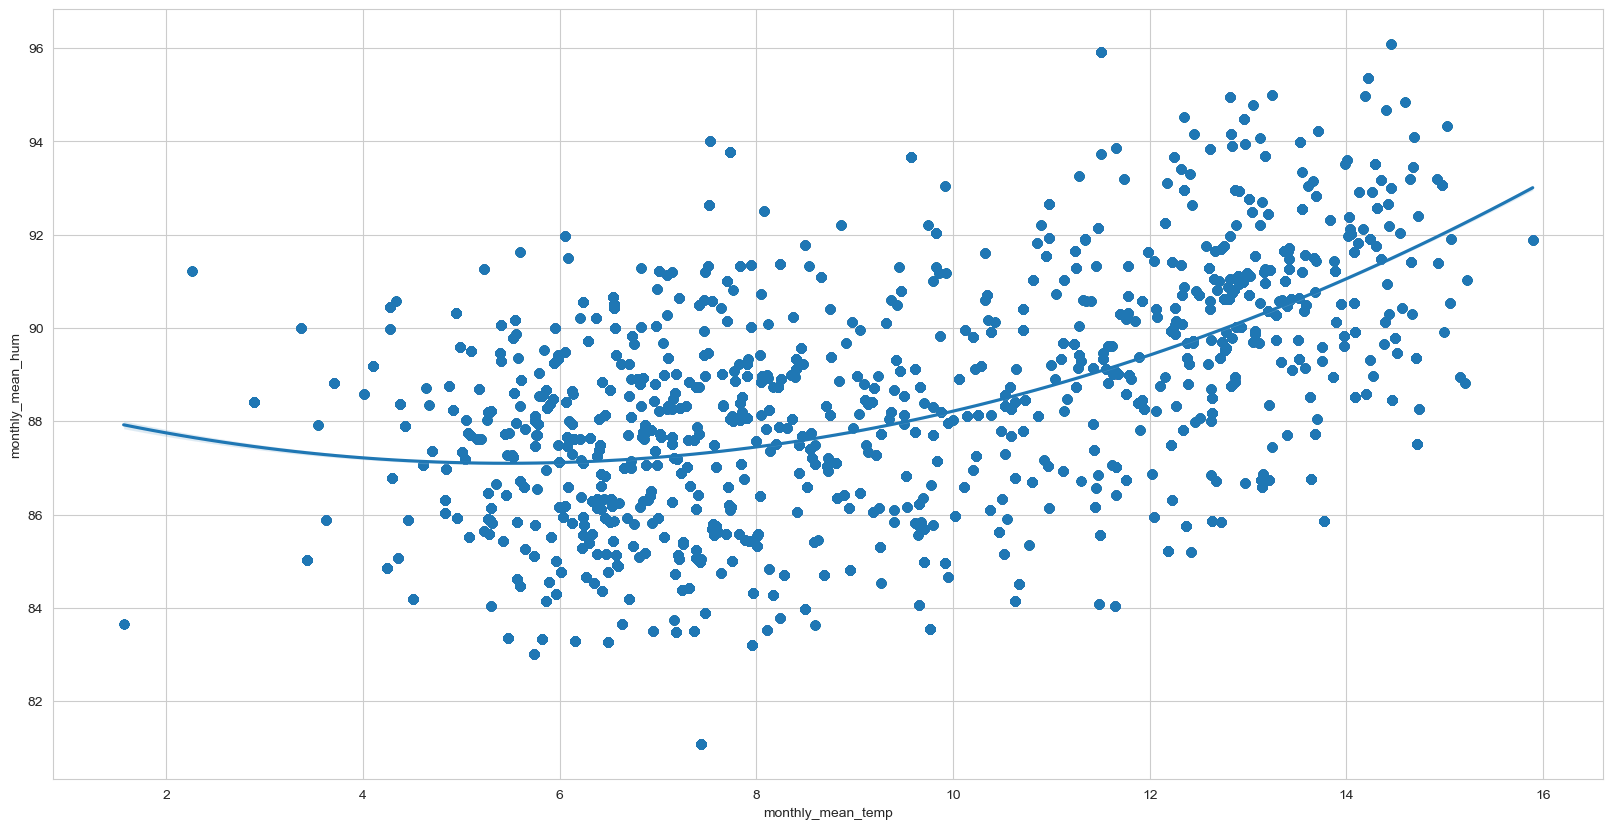

In [43]:
#sns.scatterplot(x=df_rth['monthly_mean_temp'], y=df_rth['monthly_mean_hum'], color='blue')
sns.regplot(x="monthly_mean_temp", y="monthly_mean_hum", data=df_rth, order=2)
#sns.lmplot(x="monthly_mean_temp", y="monthly_mean_hum", data=df_rth)

As expected, the scatter shows a positive and moderate correlation between temperature and humidity, where both variables usually increase when the other increases as well.

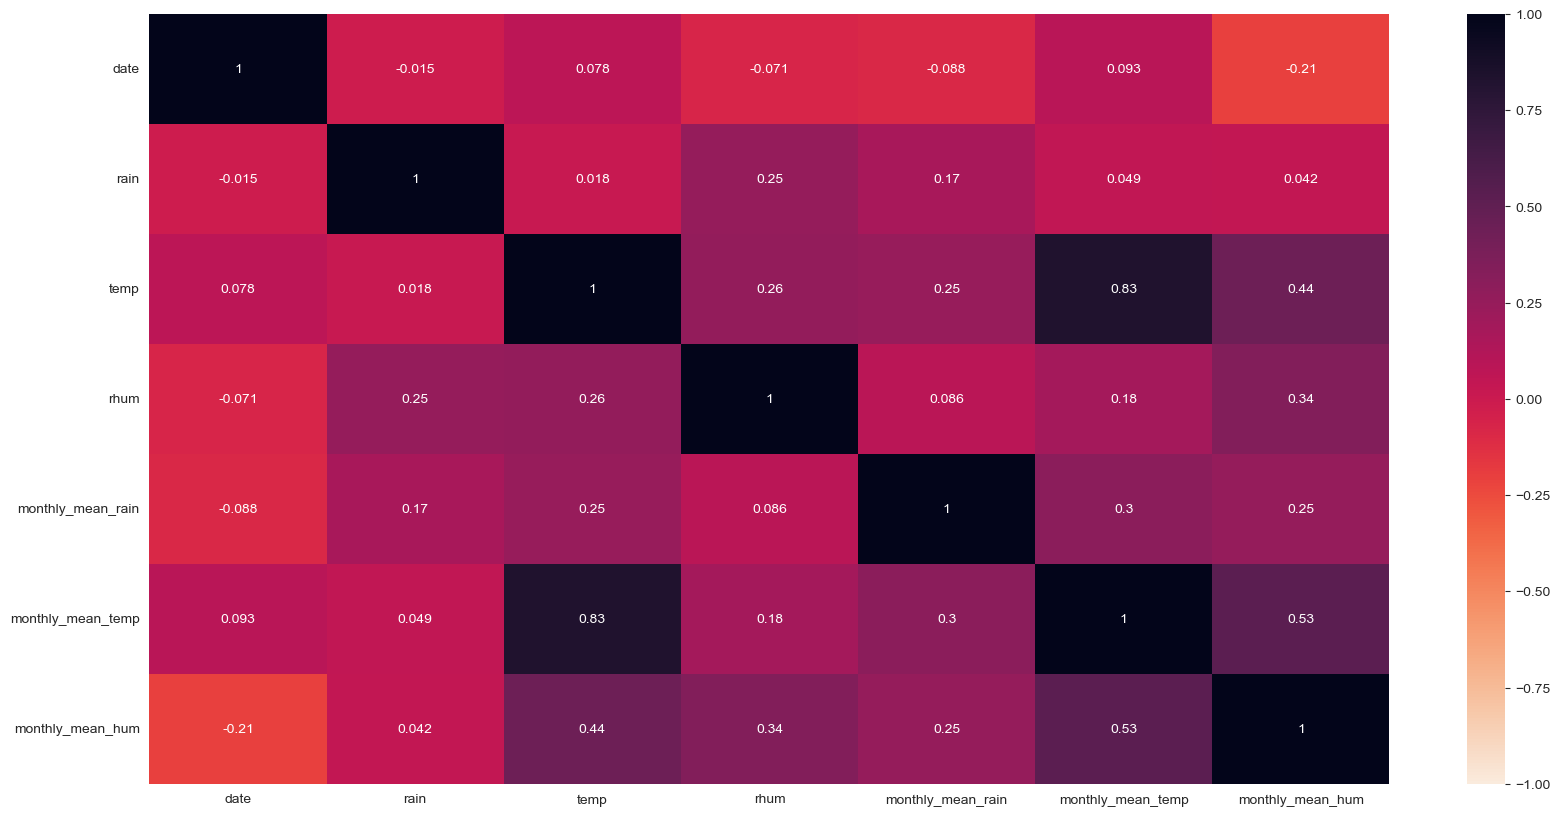

In [44]:
import seaborn as sns

sns.heatmap(df_rth.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

----
## END